In [965]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime
import plotly.express as px
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, f1_score, recall_score, precision_score
from sklearn.preprocessing import LabelEncoder

# 1.) Data Preprocessing

In [966]:
dataset = pd.read_csv('../Datasets/RTA Dataset.csv')

In [967]:
dataset.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


## 1.1) Numeric Features

In [968]:
dataset_cont = dataset[['Number_of_vehicles_involved' ,'Number_of_casualties', 'Accident_severity']]
cont_features = dataset_cont.columns

In [969]:
cont_features

Index(['Number_of_vehicles_involved', 'Number_of_casualties',
       'Accident_severity'],
      dtype='object')

### 1.1.1) Number of Vehicles

In [970]:
dataset_cont['Number_of_vehicles_involved'].value_counts()

2    8340
1    1996
3    1568
4     363
6      42
7       7
Name: Number_of_vehicles_involved, dtype: int64

In [971]:
dataset_cont['Number_of_vehicles_involved'].isnull().sum()

0

In [972]:
dataset_cont['Number_of_vehicles_involved'].describe()

count    12316.000000
mean         2.040679
std          0.688790
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          7.000000
Name: Number_of_vehicles_involved, dtype: float64

### 1.2.1) Number of casualties

In [973]:
dataset_cont['Number_of_casualties'].describe()

count    12316.000000
mean         1.548149
std          1.007179
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          8.000000
Name: Number_of_casualties, dtype: float64

In [974]:
dataset_cont['Number_of_casualties'].isnull().sum()

0

## 1.2.) Missing Values

In [975]:
missingValues = pd.DataFrame(dataset.isnull().sum()).reset_index().rename(columns={'Index': 'Feature', 0:'Missing Count'}).sort_values(by=['Missing Count'], ascending=False)

In [976]:
missingValues

,index,Missing Count
10,Defect_of_vehicle,4427
9,Service_year_of_vehicle,3928
27,Work_of_casuality,3198
28,Fitness_of_casuality,2635
7,Type_of_vehicle,950
14,Types_of_Junction,887
6,Driving_experience,829
4,Educational_level,741
5,Vehicle_driver_relation,579
8,Owner_of_vehicle,482


##### We can see that following features have very large count of missing values so dropping those features.


In [977]:
dataset.drop(columns = ['Defect_of_vehicle', 'Work_of_casuality', 'Fitness_of_casuality','Vehicle_driver_relation','Service_year_of_vehicle'], inplace=True)

In [978]:
missingValues = pd.DataFrame(dataset.isnull().sum()).reset_index().rename(columns={'Index': 'Feature', 0:'Missing Count'}).sort_values(by=['Missing Count'], ascending=False)

In [979]:
missingValues

,index,Missing Count
6,Type_of_vehicle,950
11,Types_of_Junction,887
5,Driving_experience,829
4,Educational_level,741
7,Owner_of_vehicle,482
9,Lanes_or_Medians,385
19,Vehicle_movement,308
8,Area_accident_occured,239
12,Road_surface_type,172
16,Type_of_collision,155


In [980]:
non_null_Dataframe = missingValues.tail(16)

In [981]:
non_null_Dataframe

,index,Missing Count
22,Age_band_of_casualty,0
21,Sex_of_casualty,0
0,Time,0
23,Casualty_severity,0
24,Pedestrian_movement,0
25,Cause_of_accident,0
20,Casualty_class,0
13,Road_surface_conditions,0
18,Number_of_casualties,0
17,Number_of_vehicles_involved,0


In [982]:
non_null_features = list(non_null_Dataframe['index'])

In [983]:
non_null_features

['Age_band_of_casualty',
 'Sex_of_casualty',
 'Time',
 'Casualty_severity',
 'Pedestrian_movement',
 'Cause_of_accident',
 'Casualty_class',
 'Road_surface_conditions',
 'Number_of_casualties',
 'Number_of_vehicles_involved',
 'Weather_conditions',
 'Light_conditions',
 'Day_of_week',
 'Sex_of_driver',
 'Age_band_of_driver',
 'Accident_severity']

## 1.3) Creating Training Dataframe

In [984]:
trainingDataframe = dataset[non_null_features]

In [985]:
trainingDataframe.head()

,Age_band_of_casualty,Sex_of_casualty,Time,Casualty_severity,Pedestrian_movement,Cause_of_accident,Casualty_class,Road_surface_conditions,Number_of_casualties,Number_of_vehicles_involved,Weather_conditions,Light_conditions,Day_of_week,Sex_of_driver,Age_band_of_driver,Accident_severity
0,na,na,17:02:00,na,Not a Pedestrian,Moving Backward,na,Dry,2,2,Normal,Daylight,Monday,Male,18-30,Slight Injury
1,na,na,17:02:00,na,Not a Pedestrian,Overtaking,na,Dry,2,2,Normal,Daylight,Monday,Male,31-50,Slight Injury
2,31-50,Male,17:02:00,3,Not a Pedestrian,Changing lane to the left,Driver or rider,Dry,2,2,Normal,Daylight,Monday,Male,18-30,Serious Injury
3,18-30,Female,1:06:00,3,Not a Pedestrian,Changing lane to the right,Pedestrian,Dry,2,2,Normal,Darkness - lights lit,Sunday,Male,18-30,Slight Injury
4,na,na,1:06:00,na,Not a Pedestrian,Overtaking,na,Dry,2,2,Normal,Darkness - lights lit,Sunday,Male,18-30,Slight Injury


In [986]:
def getHour(time):
  value = datetime.strptime(time, '%H:%M:%S')
  return value.hour

In [987]:
trainingDataframe['Time'] = trainingDataframe['Time'].apply(getHour)

C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [988]:
trainingDataframe.head()

,Age_band_of_casualty,Sex_of_casualty,Time,Casualty_severity,Pedestrian_movement,Cause_of_accident,Casualty_class,Road_surface_conditions,Number_of_casualties,Number_of_vehicles_involved,Weather_conditions,Light_conditions,Day_of_week,Sex_of_driver,Age_band_of_driver,Accident_severity
0,na,na,17,na,Not a Pedestrian,Moving Backward,na,Dry,2,2,Normal,Daylight,Monday,Male,18-30,Slight Injury
1,na,na,17,na,Not a Pedestrian,Overtaking,na,Dry,2,2,Normal,Daylight,Monday,Male,31-50,Slight Injury
2,31-50,Male,17,3,Not a Pedestrian,Changing lane to the left,Driver or rider,Dry,2,2,Normal,Daylight,Monday,Male,18-30,Serious Injury
3,18-30,Female,1,3,Not a Pedestrian,Changing lane to the right,Pedestrian,Dry,2,2,Normal,Darkness - lights lit,Sunday,Male,18-30,Slight Injury
4,na,na,1,na,Not a Pedestrian,Overtaking,na,Dry,2,2,Normal,Darkness - lights lit,Sunday,Male,18-30,Slight Injury


In [989]:
def makeDummies(feature):
  globals() ['{}'.format(feature)] = pd.get_dummies(trainingDataframe[feature])

In [990]:
for feature in non_null_features:
  makeDummies(feature)

In [991]:
non_null_features

['Age_band_of_casualty',
 'Sex_of_casualty',
 'Time',
 'Casualty_severity',
 'Pedestrian_movement',
 'Cause_of_accident',
 'Casualty_class',
 'Road_surface_conditions',
 'Number_of_casualties',
 'Number_of_vehicles_involved',
 'Weather_conditions',
 'Light_conditions',
 'Day_of_week',
 'Sex_of_driver',
 'Age_band_of_driver',
 'Accident_severity']

In [992]:
LabeledDataFrame = pd.concat([Casualty_class,
 Pedestrian_movement,
 Cause_of_accident,
 Casualty_severity,
 Age_band_of_casualty,
 Sex_of_casualty,
 Time,
 Road_surface_conditions,
 Number_of_casualties,
 Number_of_vehicles_involved,
 Weather_conditions,
 Light_conditions,
 Day_of_week,
 Sex_of_driver,
 Age_band_of_driver,
 Accident_severity], axis=1)

In [993]:
LabeledDataFrame.head()

,Driver or rider,Passenger,Pedestrian,na,Crossing from driver's nearside,Crossing from nearside - masked by parked or statioNot a Pedestrianry vehicle,Crossing from offside - masked by parked or statioNot a Pedestrianry vehicle,"In carriageway, statioNot a Pedestrianry - not crossing (standing or playing)","In carriageway, statioNot a Pedestrianry - not crossing (standing or playing) - masked by parked or statioNot a Pedestrianry vehicle",Not a Pedestrian,...,Male,Unknown,18-30,31-50,Over 51,Under 18,Unknown,Fatal injury,Serious Injury,Slight Injury
0,0,0,0,1,0,0,0,0,0,1,...,1,0,1,0,0,0,0,0,0,1
1,0,0,0,1,0,0,0,0,0,1,...,1,0,0,1,0,0,0,0,0,1
2,1,0,0,0,0,0,0,0,0,1,...,1,0,1,0,0,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,1,...,1,0,1,0,0,0,0,0,0,1
4,0,0,0,1,0,0,0,0,0,1,...,1,0,1,0,0,0,0,0,0,1


In [994]:
LabeledDataFrame.shape

(12316, 119)

## 1.4) Defining useful methods for preprocessing

In [995]:
features_with_low_accuracy = list()

In [996]:
def getNullIndexes(feature):
  null_indexes = dataset[pd.isna(dataset[feature])].index
  return null_indexes

In [997]:
def get_X_Y(null_indexes, feature):
  
  X = LabeledDataFrame.drop(null_indexes)
  y = dataset.drop(null_indexes)[feature]
  return X,y

In [998]:
def prepareModel(X_train, X_test, y_train, y_test):
  gbc = GradientBoostingClassifier()
  gbc.fit(X_train,y_train)
  print('Accuracy on Training Data: ',accuracy_score(y_train, gbc.predict(X_train)))
  print('Accuracy on Training Data: ',accuracy_score(y_test, gbc.predict(X_test)))
  if accuracy_score(y_test, gbc.predict(X_test)) < .5 : features_with_low_accuracy.append(feature)
  return gbc

In [999]:
def get_missing_predictions(gbc, null_indexes, feature):
  predictions = gbc.predict(LabeledDataFrame.iloc[null_indexes])
  predicted = pd.DataFrame(predictions, columns=[feature], index=null_indexes)
  return predicted

In [1000]:
def impute(fromDataset, feature, null_indexes):
  for i in null_indexes:
    dataset[feature][i] = fromDataset[feature][i]

In [1001]:
def modeImputation(value,feat):
  mode = dataset[feat].mode()[0]
  if pd.isna(value):
    return mode
  else: return value

## 1.5) Imputing missing values

In [1002]:
def ImputeScript(feature):
  if feature in ['Type_of_vehicle', 'Types_of_Junction', 'Driving_experience', 'Lanes_or_Medians', 'Area_accident_occured']:
    dataset[feature] = dataset[feature].apply(modeImputation, feat = feature)

  else:
    print('For feature: {}'.format(feature))
    dof_null_indexes = getNullIndexes(feature)
    X_dof, y_dof = get_X_Y(dof_null_indexes, feature)
    X_train, X_test, y_train, y_test = train_test_split(X_dof, y_dof, test_size=.3, random_state=101)
    gbc = prepareModel(X_train, X_test, y_train, y_test)
    predictedDataframe = get_missing_predictions(gbc, dof_null_indexes, feature)
    impute(predictedDataframe, feature, dof_null_indexes)
    print()
    print()

In [1003]:
missingValues

,index,Missing Count
6,Type_of_vehicle,950
11,Types_of_Junction,887
5,Driving_experience,829
4,Educational_level,741
7,Owner_of_vehicle,482
9,Lanes_or_Medians,385
19,Vehicle_movement,308
8,Area_accident_occured,239
12,Road_surface_type,172
16,Type_of_collision,155


In [1004]:
feature_with_missing_values = list(missingValues.head(11)['index'])

In [1005]:
feature_with_missing_values

['Type_of_vehicle',
 'Types_of_Junction',
 'Driving_experience',
 'Educational_level',
 'Owner_of_vehicle',
 'Lanes_or_Medians',
 'Vehicle_movement',
 'Area_accident_occured',
 'Road_surface_type',
 'Type_of_collision',
 'Road_allignment']

In [1006]:
dataset[feature_with_missing_values].isnull().sum()

Type_of_vehicle          950
Types_of_Junction        887
Driving_experience       829
Educational_level        741
Owner_of_vehicle         482
Lanes_or_Medians         385
Vehicle_movement         308
Area_accident_occured    239
Road_surface_type        172
Type_of_collision        155
Road_allignment          142
dtype: int64

In [1007]:
for feature in feature_with_missing_values:
  ImputeScript(feature)

For feature: Educational_level


C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names th

Accuracy on Training Data:  0.6764996297210565
Accuracy on Training Data:  0.638640944428448


For feature: Owner_of_vehicle


C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names th

Accuracy on Training Data:  0.8847036098032114
Accuracy on Training Data:  0.887074063644044


For feature: Vehicle_movement


C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Accuracy on Training Data:  0.702558001189768
Accuracy on Training Data:  0.6661115736885929


C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\PRIYES~1\AppData\Local\Temp/ipykernel_7196/2841034354.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[feature][i] = fromDataset[feature][i]




For feature: Road_surface_type


C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names th

Accuracy on Training Data:  0.9381176470588235
Accuracy on Training Data:  0.9231613611416026


For feature: Type_of_collision


C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Accuracy on Training Data:  0.7342575187969925
Accuracy on Training Data:  0.721019457385585


For feature: Road_allignment


C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\PRIYES~1\AppData\Local\Temp/ipykernel_7196/2841034354.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[feature][i] = fromDataset[feature][i]
C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\v

Accuracy on Training Data:  0.8707898134021829
Accuracy on Training Data:  0.8557350123186422




C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\PRIYES~1\AppData\Local\Temp/ipykernel_7196/2841034354.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[feature][i] = fromDataset[feature][i]


In [1008]:
features_with_low_accuracy

[]

In [1009]:
dataset[feature_with_missing_values].isnull().sum()

Type_of_vehicle          0
Types_of_Junction        0
Driving_experience       0
Educational_level        0
Owner_of_vehicle         0
Lanes_or_Medians         0
Vehicle_movement         0
Area_accident_occured    0
Road_surface_type        0
Type_of_collision        0
Road_allignment          0
dtype: int64

In [1010]:
dataset.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,Lanes_or_Medians,...,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,1-2yr,Automobile,Owner,Residential areas,Two-way (divided with broken lines road marking),...,2,2,Going straight,na,na,na,na,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Above 10yr,Public (> 45 seats),Owner,Office areas,Undivided Two way,...,2,2,Going straight,na,na,na,na,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,1-2yr,Lorry (41?100Q),Owner,Recreational areas,other,...,2,2,Going straight,Driver or rider,Male,31-50,3,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,5-10yr,Public (> 45 seats),Governmental,Office areas,other,...,2,2,Going straight,Pedestrian,Female,18-30,3,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,2-5yr,Automobile,Owner,Industrial areas,other,...,2,2,Going straight,na,na,na,na,Not a Pedestrian,Overtaking,Slight Injury


In [1011]:
dataset['Time'] = dataset['Time'].apply(getHour)

In [1012]:
dataset.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,Lanes_or_Medians,...,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17,Monday,18-30,Male,Above high school,1-2yr,Automobile,Owner,Residential areas,Two-way (divided with broken lines road marking),...,2,2,Going straight,na,na,na,na,Not a Pedestrian,Moving Backward,Slight Injury
1,17,Monday,31-50,Male,Junior high school,Above 10yr,Public (> 45 seats),Owner,Office areas,Undivided Two way,...,2,2,Going straight,na,na,na,na,Not a Pedestrian,Overtaking,Slight Injury
2,17,Monday,18-30,Male,Junior high school,1-2yr,Lorry (41?100Q),Owner,Recreational areas,other,...,2,2,Going straight,Driver or rider,Male,31-50,3,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1,Sunday,18-30,Male,Junior high school,5-10yr,Public (> 45 seats),Governmental,Office areas,other,...,2,2,Going straight,Pedestrian,Female,18-30,3,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1,Sunday,18-30,Male,Junior high school,2-5yr,Automobile,Owner,Industrial areas,other,...,2,2,Going straight,na,na,na,na,Not a Pedestrian,Overtaking,Slight Injury


In [1013]:
dataset.shape

(12316, 27)

## 1.6) Finding Correlation between features

In [1014]:
import scipy.stats as ss
from sklearn.feature_selection import chi2

In [1015]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [1016]:
correlationMatrix = list()

In [1017]:
dataset.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,Lanes_or_Medians,...,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17,Monday,18-30,Male,Above high school,1-2yr,Automobile,Owner,Residential areas,Two-way (divided with broken lines road marking),...,2,2,Going straight,na,na,na,na,Not a Pedestrian,Moving Backward,Slight Injury
1,17,Monday,31-50,Male,Junior high school,Above 10yr,Public (> 45 seats),Owner,Office areas,Undivided Two way,...,2,2,Going straight,na,na,na,na,Not a Pedestrian,Overtaking,Slight Injury
2,17,Monday,18-30,Male,Junior high school,1-2yr,Lorry (41?100Q),Owner,Recreational areas,other,...,2,2,Going straight,Driver or rider,Male,31-50,3,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1,Sunday,18-30,Male,Junior high school,5-10yr,Public (> 45 seats),Governmental,Office areas,other,...,2,2,Going straight,Pedestrian,Female,18-30,3,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1,Sunday,18-30,Male,Junior high school,2-5yr,Automobile,Owner,Industrial areas,other,...,2,2,Going straight,na,na,na,na,Not a Pedestrian,Overtaking,Slight Injury


In [1018]:
for fromfeature in dataset.columns:
  correlationList = list()
  for toFeature in dataset.columns:
    correlation = cramers_v(dataset[fromfeature], dataset[toFeature])
    correlationList.append(correlation)
  correlationMatrix.append(correlationList) 

In [1019]:
correlationDataFrame = pd.DataFrame(correlationMatrix, columns=dataset.columns, index=dataset.columns)

<AxesSubplot:>

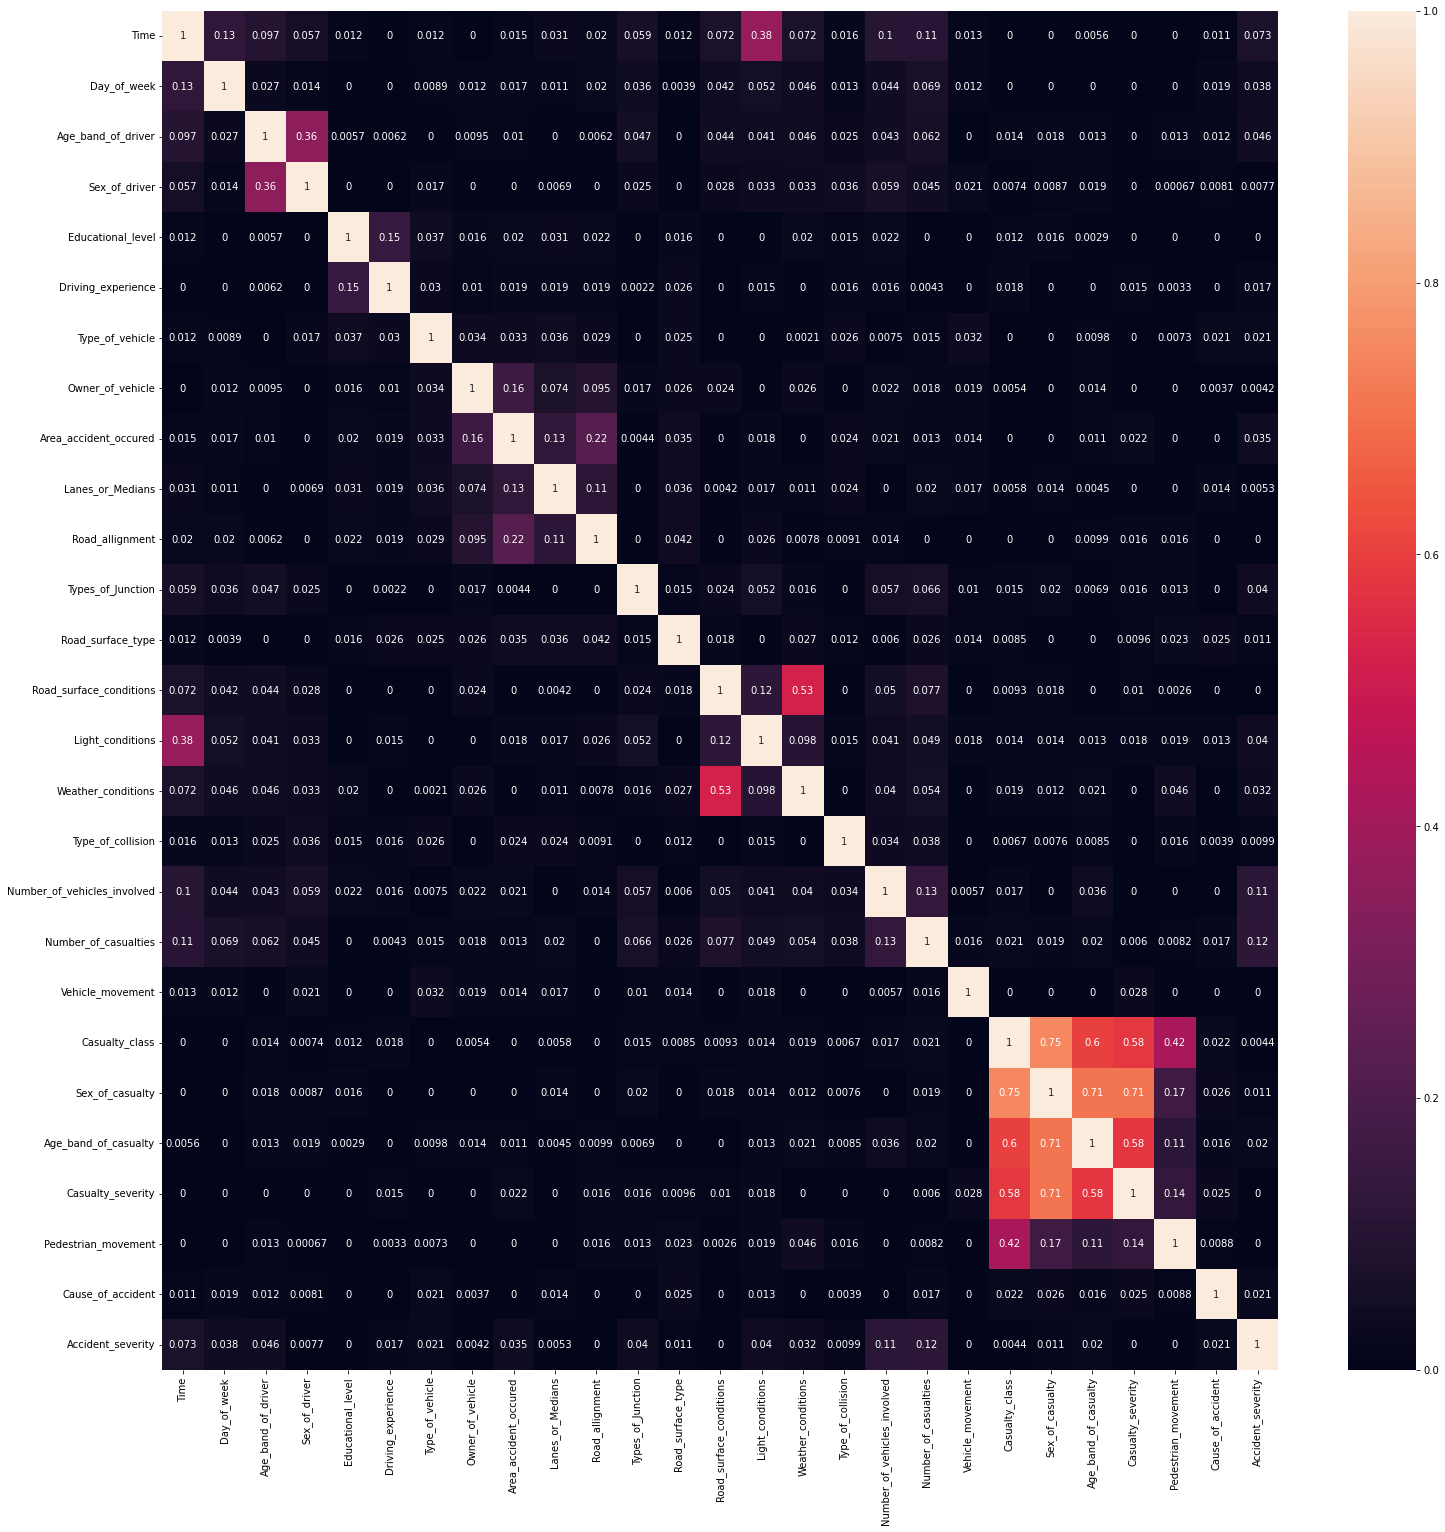

In [1020]:
plt.figure(figsize=(25,25))
sns.heatmap(correlationDataFrame, annot=True)

## 1.7) Features Selection

In [1021]:
features_with_low_accuracy

[]

In [1022]:
dataset.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,Lanes_or_Medians,...,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17,Monday,18-30,Male,Above high school,1-2yr,Automobile,Owner,Residential areas,Two-way (divided with broken lines road marking),...,2,2,Going straight,na,na,na,na,Not a Pedestrian,Moving Backward,Slight Injury
1,17,Monday,31-50,Male,Junior high school,Above 10yr,Public (> 45 seats),Owner,Office areas,Undivided Two way,...,2,2,Going straight,na,na,na,na,Not a Pedestrian,Overtaking,Slight Injury
2,17,Monday,18-30,Male,Junior high school,1-2yr,Lorry (41?100Q),Owner,Recreational areas,other,...,2,2,Going straight,Driver or rider,Male,31-50,3,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1,Sunday,18-30,Male,Junior high school,5-10yr,Public (> 45 seats),Governmental,Office areas,other,...,2,2,Going straight,Pedestrian,Female,18-30,3,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1,Sunday,18-30,Male,Junior high school,2-5yr,Automobile,Owner,Industrial areas,other,...,2,2,Going straight,na,na,na,na,Not a Pedestrian,Overtaking,Slight Injury


In [1023]:
dataset.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Driving_experience', 'Type_of_vehicle',
       'Owner_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Pedestrian_movement', 'Cause_of_accident', 'Accident_severity'],
      dtype='object')

In [1024]:
features_to_remove = ['Casualty_class', 'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity', 'Type_of_vehicle']

In [1025]:
dataset = dataset.drop(features_to_remove, axis=1)

In [1026]:
dataset.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Driving_experience', 'Owner_of_vehicle',
       'Area_accident_occured', 'Lanes_or_Medians', 'Road_allignment',
       'Types_of_Junction', 'Road_surface_type', 'Road_surface_conditions',
       'Light_conditions', 'Weather_conditions', 'Type_of_collision',
       'Number_of_vehicles_involved', 'Number_of_casualties',
       'Vehicle_movement', 'Pedestrian_movement', 'Cause_of_accident',
       'Accident_severity'],
      dtype='object')

In [1027]:
dataset.shape

(12316, 22)

# 2.) Model Creation

### 2.1)  Evaluating baseline model

In [1028]:
modelsDict = dict()

In [1029]:
dataset.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Driving_experience,Owner_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,...,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17,Monday,18-30,Male,Above high school,1-2yr,Owner,Residential areas,Two-way (divided with broken lines road marking),Tangent road with flat terrain,...,Dry,Daylight,Normal,Collision with roadside-parked vehicles,2,2,Going straight,Not a Pedestrian,Moving Backward,Slight Injury
1,17,Monday,31-50,Male,Junior high school,Above 10yr,Owner,Office areas,Undivided Two way,Tangent road with flat terrain,...,Dry,Daylight,Normal,Vehicle with vehicle collision,2,2,Going straight,Not a Pedestrian,Overtaking,Slight Injury
2,17,Monday,18-30,Male,Junior high school,1-2yr,Owner,Recreational areas,other,Tangent road with flat terrain,...,Dry,Daylight,Normal,Collision with roadside objects,2,2,Going straight,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1,Sunday,18-30,Male,Junior high school,5-10yr,Governmental,Office areas,other,Tangent road with mild grade and flat terrain,...,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1,Sunday,18-30,Male,Junior high school,2-5yr,Owner,Industrial areas,other,Tangent road with flat terrain,...,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Not a Pedestrian,Overtaking,Slight Injury


In [1030]:
def encodeTime(time):
  if time >=6 and time<18: 
    return 'Day'
  else:
    return 'Night'

In [1031]:
dataset['Time'] = dataset['Time'].apply(encodeTime)

In [1032]:
dataset['Time'].value_counts()

Day      8361
Night    3955
Name: Time, dtype: int64

In [1033]:
dataset.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Driving_experience,Owner_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,...,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Pedestrian_movement,Cause_of_accident,Accident_severity
0,Day,Monday,18-30,Male,Above high school,1-2yr,Owner,Residential areas,Two-way (divided with broken lines road marking),Tangent road with flat terrain,...,Dry,Daylight,Normal,Collision with roadside-parked vehicles,2,2,Going straight,Not a Pedestrian,Moving Backward,Slight Injury
1,Day,Monday,31-50,Male,Junior high school,Above 10yr,Owner,Office areas,Undivided Two way,Tangent road with flat terrain,...,Dry,Daylight,Normal,Vehicle with vehicle collision,2,2,Going straight,Not a Pedestrian,Overtaking,Slight Injury
2,Day,Monday,18-30,Male,Junior high school,1-2yr,Owner,Recreational areas,other,Tangent road with flat terrain,...,Dry,Daylight,Normal,Collision with roadside objects,2,2,Going straight,Not a Pedestrian,Changing lane to the left,Serious Injury
3,Night,Sunday,18-30,Male,Junior high school,5-10yr,Governmental,Office areas,other,Tangent road with mild grade and flat terrain,...,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Not a Pedestrian,Changing lane to the right,Slight Injury
4,Night,Sunday,18-30,Male,Junior high school,2-5yr,Owner,Industrial areas,other,Tangent road with flat terrain,...,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Not a Pedestrian,Overtaking,Slight Injury


In [1034]:
X = dataset

In [1035]:
# Ordinal encoding of features
X['Sex_of_driver'] = X['Sex_of_driver'].map({'Female': 0, 'Male': 1})
X['Time'] = X['Time'].map({'Day': 0, 'Night': 1})

X['Age_band_of_driver'] = X['Age_band_of_driver'].map({'Under 18': 0, '18-30': 1, '31-50': 2, 'Over 51': 3})
X['Driving_experience'] = X['Driving_experience'].map({'No Licence': 0, 'Below 1yr': 1, '1-2yr': 2, '2-5yr': 3, '5-10yr': 4, 'Above 10yr': 5})
X['Educational_level'] = X['Educational_level'].map({'Illiterate': 0, 'Writing & reading': 1, 'Elementary school': 2, 'Junior high school': 3, 'High school': 4, 'Above high school': 5})
X['Accident_severity'] = X['Accident_severity'].map({'Slight Injury': 0, 'Serious Injury': 1, 'Fatal injury': 2})

In [1036]:
X.shape

(12316, 22)

In [1037]:
#These missing values are for the unknown/Unknown values in the columns. So they got converted to NaN on encoding
X.dropna(inplace=True)

In [1038]:
X.isnull().sum()

Time                           0
Day_of_week                    0
Age_band_of_driver             0
Sex_of_driver                  0
Educational_level              0
Driving_experience             0
Owner_of_vehicle               0
Area_accident_occured          0
Lanes_or_Medians               0
Road_allignment                0
Types_of_Junction              0
Road_surface_type              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Vehicle_movement               0
Pedestrian_movement            0
Cause_of_accident              0
Accident_severity              0
dtype: int64

In [1039]:
mapped_cols = ['Driving_experience', 'Sex_of_driver', 'Age_band_of_driver', 'Educational_level', 'Time', 'Accident_severity']

In [1040]:
df1 = X[mapped_cols]

In [1041]:
df1.head()

,Driving_experience,Sex_of_driver,Age_band_of_driver,Educational_level,Time,Accident_severity
0,2.0,1.0,1.0,5.0,0,0
1,5.0,1.0,2.0,3.0,0,0
2,2.0,1.0,1.0,3.0,0,1
3,4.0,1.0,1.0,3.0,1,0
4,3.0,1.0,1.0,3.0,1,0


In [1042]:
X.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Driving_experience,Owner_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,...,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Pedestrian_movement,Cause_of_accident,Accident_severity
0,0,Monday,1.0,1.0,5.0,2.0,Owner,Residential areas,Two-way (divided with broken lines road marking),Tangent road with flat terrain,...,Dry,Daylight,Normal,Collision with roadside-parked vehicles,2,2,Going straight,Not a Pedestrian,Moving Backward,0
1,0,Monday,2.0,1.0,3.0,5.0,Owner,Office areas,Undivided Two way,Tangent road with flat terrain,...,Dry,Daylight,Normal,Vehicle with vehicle collision,2,2,Going straight,Not a Pedestrian,Overtaking,0
2,0,Monday,1.0,1.0,3.0,2.0,Owner,Recreational areas,other,Tangent road with flat terrain,...,Dry,Daylight,Normal,Collision with roadside objects,2,2,Going straight,Not a Pedestrian,Changing lane to the left,1
3,1,Sunday,1.0,1.0,3.0,4.0,Governmental,Office areas,other,Tangent road with mild grade and flat terrain,...,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Not a Pedestrian,Changing lane to the right,0
4,1,Sunday,1.0,1.0,3.0,3.0,Owner,Industrial areas,other,Tangent road with flat terrain,...,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Not a Pedestrian,Overtaking,0


In [1043]:
cols_yet_to_map = X.drop(mapped_cols, axis=1).columns

In [1044]:
cols_yet_to_map

Index(['Day_of_week', 'Owner_of_vehicle', 'Area_accident_occured',
       'Lanes_or_Medians', 'Road_allignment', 'Types_of_Junction',
       'Road_surface_type', 'Road_surface_conditions', 'Light_conditions',
       'Weather_conditions', 'Type_of_collision',
       'Number_of_vehicles_involved', 'Number_of_casualties',
       'Vehicle_movement', 'Pedestrian_movement', 'Cause_of_accident'],
      dtype='object')

In [1045]:
df2 = X[cols_yet_to_map]

In [1046]:
df2 = pd.get_dummies(df2)

In [1047]:
df2.head()

,Number_of_vehicles_involved,Number_of_casualties,Day_of_week_Friday,Day_of_week_Monday,Day_of_week_Saturday,Day_of_week_Sunday,Day_of_week_Thursday,Day_of_week_Tuesday,Day_of_week_Wednesday,Owner_of_vehicle_Governmental,...,Cause_of_accident_No distancing,Cause_of_accident_No priority to pedestrian,Cause_of_accident_No priority to vehicle,Cause_of_accident_Other,Cause_of_accident_Overloading,Cause_of_accident_Overspeed,Cause_of_accident_Overtaking,Cause_of_accident_Overturning,Cause_of_accident_Turnover,Cause_of_accident_Unknown
0,2,2,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,2,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,2,2,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,2,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2,2,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [1048]:
final_df = pd.concat([df1, df2], axis=1)

In [1049]:
final_df.head()

,Driving_experience,Sex_of_driver,Age_band_of_driver,Educational_level,Time,Accident_severity,Number_of_vehicles_involved,Number_of_casualties,Day_of_week_Friday,Day_of_week_Monday,...,Cause_of_accident_No distancing,Cause_of_accident_No priority to pedestrian,Cause_of_accident_No priority to vehicle,Cause_of_accident_Other,Cause_of_accident_Overloading,Cause_of_accident_Overspeed,Cause_of_accident_Overtaking,Cause_of_accident_Overturning,Cause_of_accident_Turnover,Cause_of_accident_Unknown
0,2.0,1.0,1.0,5.0,0,0,2,2,0,1,...,0,0,0,0,0,0,0,0,0,0
1,5.0,1.0,2.0,3.0,0,0,2,2,0,1,...,0,0,0,0,0,0,1,0,0,0
2,2.0,1.0,1.0,3.0,0,1,2,2,0,1,...,0,0,0,0,0,0,0,0,0,0
3,4.0,1.0,1.0,3.0,1,0,2,2,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3.0,1.0,1.0,3.0,1,0,2,2,0,0,...,0,0,0,0,0,0,1,0,0,0


In [1050]:
final_df.shape

(10481, 131)

In [1051]:
y = dataset['Accident_severity']

In [1052]:
y

0        0
1        0
2        1
3        0
4        0
        ..
12310    1
12311    0
12313    1
12314    0
12315    0
Name: Accident_severity, Length: 10481, dtype: int64

In [1053]:
final_df.isnull().sum()

Driving_experience               0
Sex_of_driver                    0
Age_band_of_driver               0
Educational_level                0
Time                             0
                                ..
Cause_of_accident_Overspeed      0
Cause_of_accident_Overtaking     0
Cause_of_accident_Overturning    0
Cause_of_accident_Turnover       0
Cause_of_accident_Unknown        0
Length: 131, dtype: int64

In [1054]:
X_train, X_test, y_train, y_test = train_test_split(final_df, y, test_size=.3, random_state=101)

In [1055]:
from xgboost import XGBClassifier

In [1056]:
XGBClassifier().get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': True,
 'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'enable_categorical': False,
 'gamma': None,
 'gpu_id': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_delta_step': None,
 'max_depth': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [1057]:
def buildModel(X_train, X_test, y_train, y_test, modelVersion):
  clf = XGBClassifier(n_jobs = 6, use_label_encoder=False)
  clf.fit(X_train,y_train)
  train_predictions = clf.predict(X_train)
  test_predictions = clf.predict(X_test)



  print('Classification Report: ', classification_report(y_test, test_predictions))
  print('Confusion Matrix: ', confusion_matrix(y_test, test_predictions))

  train_accuracy = accuracy_score(y_train, clf.predict(X_train))
  train_precision = precision_score(y_train, clf.predict(X_train), average=None)
  train_recall = recall_score(y_train, clf.predict(X_train), average=None)
  train_f1Score = f1_score(y_train, clf.predict(X_train), average = None)

  test_accuracy = accuracy_score(y_test, clf.predict(X_test))
  test_precision = precision_score(y_test, clf.predict(X_test), average=None)
  test_recall = recall_score(y_test, clf.predict(X_test), average=None)
  test_f1Score = f1_score(y_test, clf.predict(X_test), average=None)

  
  modelDict = {
    'Training Data':{
      'accuracy' : train_accuracy,
      'precision' : train_precision,
      'recall' : train_recall,
      'F1 score' : train_f1Score
    },

    'Test Data' :{
      'accuracy' : test_accuracy,
      'precision' : test_precision,
      'recall' : test_recall,
      'F1 score' : test_f1Score
    }
  }

  modelsDict[modelVersion] = modelDict

In [1058]:
buildModel(X_train, X_test, y_train, y_test, 'Initial Model')

[01:07:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Classification Report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00      2625
           1       1.00      1.00      1.00       471
           2       1.00      1.00      1.00        49

    accuracy                           1.00      3145
   macro avg       1.00      1.00      1.00      3145
weighted avg       1.00      1.00      1.00      3145

Confusion Matrix:  [[2625    0    0]
 [   0  471    0]
 [   0    0   49]]


## 1.8) Handeling Data Imbalance

### 1.8.1) Random under-sampling with imblearn

In [1059]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [1060]:
rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X_train, y_train)

print('Original dataset shape:', Counter(y))
print('Resample dataset shape', Counter(y_rus))

Original dataset shape: Counter({0: 8802, 1: 1529, 2: 150})
Resample dataset shape Counter({0: 101, 1: 101, 2: 101})


In [1061]:
buildModel(X_rus, X_test, y_rus, y_test, 'Random Under Sampling')

[01:07:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Classification Report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00      2625
           1       1.00      1.00      1.00       471
           2       1.00      1.00      1.00        49

    accuracy                           1.00      3145
   macro avg       1.00      1.00      1.00      3145
weighted avg       1.00      1.00      1.00      3145

Confusion Matrix:  [[2625    0    0]
 [   0  471    0]
 [   0    0   49]]


### 1.8.2) Random over-sampling with imblearn

In [1062]:
from imblearn.over_sampling import RandomOverSampler

In [1063]:
ros = RandomOverSampler(random_state=101)
X_ros, y_ros = ros.fit_resample(X_train, y_train)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_ros))

Original dataset shape Counter({0: 8802, 1: 1529, 2: 150})
Resample dataset shape Counter({0: 6177, 1: 6177, 2: 6177})


In [1064]:
buildModel(X_ros, X_test, y_ros, y_test, 'Random Over Sampling')

[01:07:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Classification Report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00      2625
           1       1.00      1.00      1.00       471
           2       1.00      1.00      1.00        49

    accuracy                           1.00      3145
   macro avg       1.00      1.00      1.00      3145
weighted avg       1.00      1.00      1.00      3145

Confusion Matrix:  [[2625    0    0]
 [   0  471    0]
 [   0    0   49]]


### 1.8.3) Using SMOTETomek

In [1065]:
from imblearn.combine import SMOTETomek

In [1066]:
sm = SMOTETomek(random_state=101, n_jobs=6)
X_Smote, y_Smote = sm._fit_resample(X_train, y_train)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_Smote))

Original dataset shape Counter({0: 8802, 1: 1529, 2: 150})
Resample dataset shape Counter({0: 6177, 1: 6177, 2: 6177})


In [1067]:
sm.get_params()

{'n_jobs': 6,
 'random_state': 101,
 'sampling_strategy': 'auto',
 'smote': None,
 'tomek': None}

In [1068]:
buildModel(X_Smote, X_test, y_Smote, y_test, 'SMOTETomek')

[01:07:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Classification Report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00      2625
           1       1.00      1.00      1.00       471
           2       1.00      1.00      1.00        49

    accuracy                           1.00      3145
   macro avg       1.00      1.00      1.00      3145
weighted avg       1.00      1.00      1.00      3145

Confusion Matrix:  [[2625    0    0]
 [   0  471    0]
 [   0    0   49]]


### 1.8.4) NearMiss

In [1069]:
from imblearn.under_sampling import NearMiss

In [1070]:
nm = NearMiss()
X_nm, y_nm = nm.fit_resample(X_train, y_train)

print('Original dataset shape:', Counter(y))
print('Resample dataset shape:', Counter(y_nm))

Original dataset shape: Counter({0: 8802, 1: 1529, 2: 150})
Resample dataset shape: Counter({0: 101, 1: 101, 2: 101})


In [1071]:
buildModel(X_nm, X_test, y_nm, y_test, 'Near Miss')

[01:07:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Classification Report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00      2625
           1       1.00      1.00      1.00       471
           2       1.00      1.00      1.00        49

    accuracy                           1.00      3145
   macro avg       1.00      1.00      1.00      3145
weighted avg       1.00      1.00      1.00      3145

Confusion Matrix:  [[2625    0    0]
 [   0  471    0]
 [   0    0   49]]


### Conclusion
##### SMOTETomek gives the best results

In [1072]:
modelsDict['SMOTETomek']

{'Training Data': {'accuracy': 1.0,
  'precision': array([1., 1., 1.]),
  'recall': array([1., 1., 1.]),
  'F1 score': array([1., 1., 1.])},
 'Test Data': {'accuracy': 1.0,
  'precision': array([1., 1., 1.]),
  'recall': array([1., 1., 1.]),
  'F1 score': array([1., 1., 1.])}}

## 1.9) Hyper-parameters Tuning

In [1073]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

In [1074]:
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=101)

In [1075]:
xgb_clf = XGBClassifier(n_jobs = 6, random_state =101)

In [1076]:
xgb_clf.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': True,
 'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'enable_categorical': False,
 'gamma': None,
 'gpu_id': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_delta_step': None,
 'max_depth': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': 6,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': 101,
 'reg_alpha': None,
 'reg_lambda': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [1077]:
# paramsDict = {
#   'n_estimators' : [100, 200, 300],
#   'max_depth' : list(range(5,14)),
#   'criterion' : ['gini'],
#   'min_samples_split': [2,3],
#   'colsample_bytree':[0.5], 
#   'colsample_bylevel':[0.5],
#   'colsample_bynode':[0.5]
#   }
paramsDict = {
 'colsample_bylevel': [0.5],
 'colsample_bytree': [0.5],
 'learning_rate': [0.05],
 'max_depth': [11],
 'min_child_weight': [5],
 'n_estimators': [200],
 'n_jobs': [6],
 'random_state': [42],
 'reg_alpha': [0],
 'reg_lambda': [1],
 'subsample': [0.8],
 }

In [1078]:
grid_search = GridSearchCV(xgb_clf, param_grid=paramsDict, cv=cv, scoring='f1_weighted', n_jobs = 6)

In [1128]:
grid_search.fit(X_Smote, y_Smote)

print('On Train Data: ', classification_report(y_Smote,grid_search.predict(X_Smote)))
print()
print('On Test Data: ',classification_report(y_test,grid_search.predict(X_test)))
print('Confusion Matrix: ',confusion_matrix(y_test, grid_search.predict(X_test)))

C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:14:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
On Train Data:                precision    recall  f1-score   support

           0       1.00      1.00      1.00      6177
           1       1.00      1.00      1.00      6177
           2       1.00      1.00      1.00      6177

    accuracy                           1.00     18531
   macro avg       1.00      1.00      1.00     18531
weighted avg       1.00      1.00      1.00     18531


On Test Data:                precision    recall  f1-score   support

           0       1.00      1.00      1.00      2625
           1       1.00      1.00      1.00       471
           2       1.00      1.00      1.00        49

    accuracy                           1.00      3145
   m

In [1134]:
predictions = grid_search.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average='weighted')
recall = recall_score(y_test, predictions, average='weighted')
f1Score = f1_score(y_test, predictions, average='weighted')

In [1137]:
performanceDataFrame = pd.DataFrame([[accuracy, precision, recall, f1Score]], columns=['Accuracy', 'Precision', 'Recall', 'F1 Score'])

In [1139]:
performanceDataFrame

,Accuracy,Precision,Recall,F1 Score
0,1.0,1.0,1.0,1.0


In [1144]:
px.bar(performanceDataFrame, title='Model\'s Perfromance Metrics').show()

In [1080]:
grid_search.best_params_

{'colsample_bylevel': 0.5,
 'colsample_bytree': 0.5,
 'learning_rate': 0.05,
 'max_depth': 11,
 'min_child_weight': 5,
 'n_estimators': 200,
 'n_jobs': 6,
 'random_state': 42,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'subsample': 0.8}

In [1081]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bylevel,param_colsample_bytree,param_learning_rate,param_max_depth,param_min_child_weight,param_n_estimators,...,split8_test_score,split9_test_score,split10_test_score,split11_test_score,split12_test_score,split13_test_score,split14_test_score,mean_test_score,std_test_score,rank_test_score
0,35.759474,8.201003,0.059342,0.024006,0.5,0.5,0.05,11,5,200,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1


In [1082]:
#best_params = {'criterion': ['gini'], 'max_depth':[11], 'n_estimators': [200]}

In [1083]:
#grid_search_best = GridSearchCV(xgb_clf, param_grid=best_params, cv=cv, n_jobs=-1)

In [1084]:
#predictions_xgb_smoteTomek_train = grid_search.predict(X_Smote)

In [1085]:
#predictions_xgb_smoteTomek_test = grid_search.predict(X_test)

In [1086]:
#print('On Train Data', classification_report(y_Smote, predictions_xgb_smoteTomek_train))

In [1087]:
#print('On Test Data', classification_report(y_test, predictions_xgb_smoteTomek_test))

# 3.) Making predictions by prepared model

In [1088]:
dataset.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Driving_experience,Owner_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,...,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Pedestrian_movement,Cause_of_accident,Accident_severity
0,0,Monday,1.0,1.0,5.0,2.0,Owner,Residential areas,Two-way (divided with broken lines road marking),Tangent road with flat terrain,...,Dry,Daylight,Normal,Collision with roadside-parked vehicles,2,2,Going straight,Not a Pedestrian,Moving Backward,0
1,0,Monday,2.0,1.0,3.0,5.0,Owner,Office areas,Undivided Two way,Tangent road with flat terrain,...,Dry,Daylight,Normal,Vehicle with vehicle collision,2,2,Going straight,Not a Pedestrian,Overtaking,0
2,0,Monday,1.0,1.0,3.0,2.0,Owner,Recreational areas,other,Tangent road with flat terrain,...,Dry,Daylight,Normal,Collision with roadside objects,2,2,Going straight,Not a Pedestrian,Changing lane to the left,1
3,1,Sunday,1.0,1.0,3.0,4.0,Governmental,Office areas,other,Tangent road with mild grade and flat terrain,...,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Not a Pedestrian,Changing lane to the right,0
4,1,Sunday,1.0,1.0,3.0,3.0,Owner,Industrial areas,other,Tangent road with flat terrain,...,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Not a Pedestrian,Overtaking,0


In [1089]:
def makePredictions(X):
  predictions = grid_search.predict(X)
  return predictions

In [1090]:
import random

In [1091]:
X_test.head()

,Driving_experience,Sex_of_driver,Age_band_of_driver,Educational_level,Time,Accident_severity,Number_of_vehicles_involved,Number_of_casualties,Day_of_week_Friday,Day_of_week_Monday,...,Cause_of_accident_No distancing,Cause_of_accident_No priority to pedestrian,Cause_of_accident_No priority to vehicle,Cause_of_accident_Other,Cause_of_accident_Overloading,Cause_of_accident_Overspeed,Cause_of_accident_Overtaking,Cause_of_accident_Overturning,Cause_of_accident_Turnover,Cause_of_accident_Unknown
1205,5.0,1.0,2.0,3.0,0,0,2,2,1,0,...,0,0,0,0,0,0,0,0,0,0
8912,4.0,1.0,2.0,3.0,1,0,2,2,0,1,...,0,0,1,0,0,0,0,0,0,0
10994,2.0,1.0,3.0,3.0,0,0,2,2,0,0,...,0,0,0,0,0,0,0,0,0,0
8425,5.0,1.0,2.0,3.0,1,0,2,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1032,5.0,1.0,2.0,3.0,0,1,2,1,0,0,...,1,0,0,0,0,0,0,0,0,0


In [1092]:
X_test.shape

(3145, 131)

In [1093]:
y_test.shape

(3145,)

In [1094]:
np.array(X_test)[1]

array([4., 1., 2., 3., 1., 0., 2., 2., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.])

In [1095]:
np.array(y_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [1127]:
randomNumber = random.choice(list(range(0, len(np.array(y_test))+1)))
print('Random Number', randomNumber)
testData = np.array(X_test)[randomNumber]
actual_value = np.array(y_test)[randomNumber]
predicted_value = makePredictions([testData])[0]

accident_severity = {2: 'Fatal injury', 1 : 'Serious injury' , 0:'Slight injury'}

print('Actual Value: ', accident_severity[actual_value])
print('Predicted Value: ', accident_severity[predicted_value])

Random Number 2580
Actual Value:  Slight injury
Predicted Value:  Slight injury


In [1097]:
final_df.head()

,Driving_experience,Sex_of_driver,Age_band_of_driver,Educational_level,Time,Accident_severity,Number_of_vehicles_involved,Number_of_casualties,Day_of_week_Friday,Day_of_week_Monday,...,Cause_of_accident_No distancing,Cause_of_accident_No priority to pedestrian,Cause_of_accident_No priority to vehicle,Cause_of_accident_Other,Cause_of_accident_Overloading,Cause_of_accident_Overspeed,Cause_of_accident_Overtaking,Cause_of_accident_Overturning,Cause_of_accident_Turnover,Cause_of_accident_Unknown
0,2.0,1.0,1.0,5.0,0,0,2,2,0,1,...,0,0,0,0,0,0,0,0,0,0
1,5.0,1.0,2.0,3.0,0,0,2,2,0,1,...,0,0,0,0,0,0,1,0,0,0
2,2.0,1.0,1.0,3.0,0,1,2,2,0,1,...,0,0,0,0,0,0,0,0,0,0
3,4.0,1.0,1.0,3.0,1,0,2,2,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3.0,1.0,1.0,3.0,1,0,2,2,0,0,...,0,0,0,0,0,0,1,0,0,0


# 4.) Saving the model

In [1098]:
import joblib

In [1099]:
joblib.dump(grid_search,'../Model/finalModel_xgb')

['../Model/finalModel_xgb']